In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Load Flowers Dataset

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/4933230161_12f3ee7587.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14741907467_fab96f3b2b_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/7728953426_abd179ab63.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6482016425_d8fab362f6.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/1379256773_bb2eb0d95b_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2863863372_605e29c03e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5840476802_dfa40deb1f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5990626258_697f007308_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14414117598_cf70df30de.jpg'),
 PosixPath('datasets/flower_photos/roses/3236806990_a90c7bb520_m.jpg')]

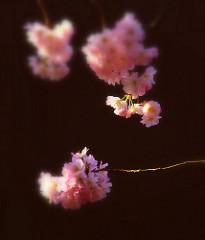

In [8]:
PIL.Image.open(str(roses[1]))

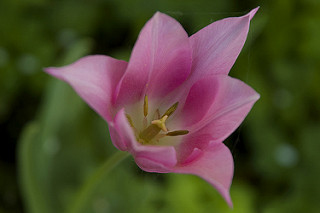

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2863863372_605e29c03e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5840476802_dfa40deb1f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5990626258_697f007308_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14414117598_cf70df30de.jpg'),
 PosixPath('datasets/flower_photos/roses/3236806990_a90c7bb520_m.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/2863863372_605e29c03e_m.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 180, 3)

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

X = np.array(X)
y = np.array(y)

In [17]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Scale Images

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [18]:
# Build convolutional neural network and train it

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 15s 23ms/step - loss: 1.3118 - accuracy: 0.4440
Epoch 2/30
86/86 [==============================] - 2s 24ms/step - loss: 0.9627 - accuracy: 0.6177
Epoch 3/30
86/86 [==============================] - 2s 26ms/step - loss: 0.7942 - accuracy: 0.6984
Epoch 4/30
86/86 [==============================] - 2s 22ms/step - loss: 0.6194 - accuracy: 0.7653
Epoch 5/30
86/86 [==============================] - 2s 21ms/step - loss: 0.3906 - accuracy: 0.8583
Epoch 6/30
86/86 [==============================] - 2s 21ms/step - loss: 0.2150 - accuracy: 0.9299
Epoch 7/30
86/86 [==============================] - 2s 21ms/step - loss: 0.1322 - accuracy: 0.9604
Epoch 8/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0467 - accuracy: 0.9884
Epoch 9/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0324 - accuracy: 0.9931
Epoch 10/30
86/86 [==============================] - 2s 24ms/step - loss: 0.0099 - accuracy: 0.9989
Epoch 11

In [27]:
acc1 = model.evaluate(X_test_scaled,y_test)[1]

print("Accuracy before data augmentation: ", round(acc1 * 100, 3), "%")

29/29 [==============================] - 0s 12ms/step - loss: 2.7521 - accuracy: 0.6710
Accuracy before data augmentation:  67.102 %


**Train accuracy is very high (100%), the test accuracy is significantly low (67%) indicating overfitting.**

In [28]:
predictions = model.predict(X_test_scaled)

score = tf.nn.softmax(predictions[0])

np.argmax(score)

29/29 [==============================] - 0s 10ms/step


1

In [29]:
y_test[0]

1

## Improve Test Accuracy Using Data Augmentation



In [35]:

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

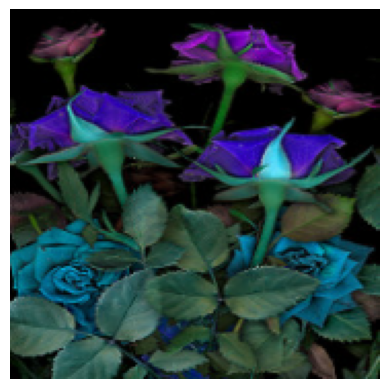

In [39]:
# Original Image

plt.axis('off')
plt.imshow(X[4])

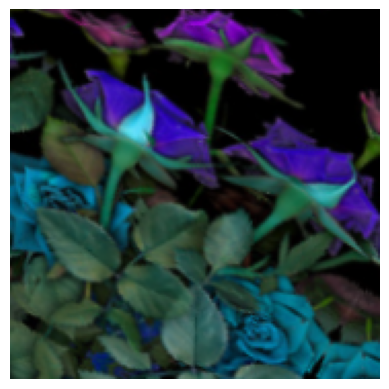

In [40]:
# Newly generated training sample using data augmentation

plt.axis('off')
plt.imshow(data_augmentation(X)[4].numpy().astype("uint8"))

Train the model using data augmentation and a drop out layer

In [41]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 5s 29ms/step - loss: 1.4472 - accuracy: 0.3507
Epoch 2/30
86/86 [==============================] - 2s 28ms/step - loss: 1.1006 - accuracy: 0.5610
Epoch 3/30
86/86 [==============================] - 3s 29ms/step - loss: 0.9429 - accuracy: 0.6214
Epoch 4/30
86/86 [==============================] - 3s 29ms/step - loss: 0.8763 - accuracy: 0.6555
Epoch 5/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8039 - accuracy: 0.6755
Epoch 6/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7801 - accuracy: 0.7006
Epoch 7/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7680 - accuracy: 0.6969
Epoch 8/30
86/86 [==============================] - 3s 29ms/step - loss: 0.7043 - accuracy: 0.7322
Epoch 9/30
86/86 [==============================] - 3s 29ms/step - loss: 0.6525 - accuracy: 0.7525
Epoch 10/30
86/86 [==============================] - 2s 28ms/step - loss: 0.6635 - accuracy: 0.7445
Epoch 11/

In [46]:
acc2 = model.evaluate(X_test_scaled,y_test)[1]

print("Accuracy after data augmentation: ", round(acc2 * 100, 3), "%")

29/29 [==============================] - 0s 12ms/step - loss: 0.8792 - accuracy: 0.7495
Accuracy after data augmentation:  74.946 %


**Using data augmentation and drop out layer the accuracy of test set predictions is increased to 75%**